# **Ayudantía 3 - Singular Value Decomposition**
## Etienne Rojas

Ante cualquier duda o posible corrección, por favor mandar un correo a `etienne.rojas@sansano.usm.cl` 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# **1 Definición**
La factorización SVD consiste en encontrar las matrices $U \Sigma V^T$ tal que:
$$
A = U \Sigma V^T
$$
$$
\begin{bmatrix}
 &  &  \\
 & A &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
 &  &  \\
 & U &  \\
 &  & 
\end{bmatrix}
\begin{bmatrix}
 &  &  \\
 & \Sigma &  \\
 &  & 
\end{bmatrix}
\begin{bmatrix}
 &  &  \\
 & V^T &  \\
 &  & 
\end{bmatrix}
$$

**La factorización existe para cualquier matriz.**

---

## **1.1 Matriz A**
Tenemos la matriz original $A$ ($n \times m$) la cual podemos ver como un conjunto de vectores columna $a_i \in \mathbb{R}^n$:
$$
\begin{bmatrix}
 &  &  \\
 & A &  \\
 &  & 
\end{bmatrix} 
=
\begin{bmatrix}
 |&  | & | \\
 a_1& ... & a_m \\
 |&  | & | 
\end{bmatrix}
$$

## **1.2 Matriz U**
La matriz $U$ es una matriz **ortogonal**, compuesta por los **normalized left singular vectors of A**, es decir los **eigenvectors** de $AA^T$:
- Es cuadrada ($n \times n$).
- Sus vectores tienen producto punto cero y tienen norma 1. 
- $U U^T = U^T U = I$
$$ 
\begin{bmatrix}
 &  &  \\
 & U &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
 |&  | & | \\
 u_1& ... & u_n \\
 |&  | & | 
\end{bmatrix}
$$

## **1.3 Matriz Sigma**
La matriz $\Sigma$ ($n\times m$) es diagonal, donde cada elemento corresponde a un valor singular de la matriz original, los cuales estan ordenados de manera descendente :
- $\sigma_1 \geq ... \geq \sigma_m$
- $\Sigma = \sqrt{diag(eigenvalues(AA^T))}$

$$
\begin{bmatrix}
 &  &  \\
 & \Sigma &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
\sigma_1 &  &  \\
 & ... &  \\
 &  &  \sigma_m
\end{bmatrix}
$$




## **1.4 Matriz V**
La matriz $V$ es una matriz **ortogonal**, compuesta por los **normalized right singular vectors of A**, es decir los **eigenvectors** de $A^T A$:
- Es cuadrada ($m \times m$).
- Sus vectores son producto punto cero y tienen norma 1.
- $VV^T = V^T V = I$

$$ 
\begin{bmatrix}
 &  &  \\
 & V^ T &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
 -&  v_1 & - \\
 -& ... & - \\
 -&  v_m & - 
\end{bmatrix}
$$


---

# **Sugerencia**
## **[visualización de la SVD](https://www.youtube.com/watch?v=vSczTbgc8Rc)**

---

# **Ejercicio 1: Facil**

Dada la matriz A
$$
A =
\begin{bmatrix}
2 & 1 & 0 \\
1 & 2 & 0 \\
0 & 0 & 2
\end{bmatrix}
$$

- Calcule la factirización SVD

---



# **Pauta Ejecicio 1**


## 1. $A$ es simetrica
Dado que la matriz $A$ es simetrica $A = A^T$, por lo tanto:
$$AA^T = A^TA = A^2$$

Ahora si lo calculamos y llagamos a:

$$
A^2 = 
\begin{bmatrix}
5 & 4 & 0 \\
4 & 5 & 0 \\
0 & 0 & 4
\end{bmatrix}
$$

## 2. Encontrar los Eigenvectors y Eigenvalues
Esto ya se vio en ayudantías anteriores, en resumen, debería llegar al siguiente polinomio característico:
$$
(\lambda^2 - 10 \lambda + 9) (4-\lambda) = 0
$$

Con las siguientes raíces:

$$
\lambda =1 , \quad \lambda=4, \quad \lambda=9
$$

Ahora que tenemos las raíces podemos calcular los Eigenvectores.

para $\lambda =9$
$$
\begin{split}

(A^2-9I)v &=0 \\

\begin{bmatrix}
-4 & 4 & 0 \\
4 & -4 & 0 \\
0 & 0 & -5
\end{bmatrix} v &= \\

\Rightarrow v_1 = v_2, v_3 =0

\end{split}
$$
LLegamos a:
$$
v(\lambda=9) = \Big[\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0 \Big]
$$


para $\lambda =4$
$$
\begin{split}

(A^2-4I)v &=0 \\

\begin{bmatrix}
1 & 4 & 0 \\
4 & 1 & 0 \\
0 & 0 & 0
\end{bmatrix} v &= \\

\Rightarrow v_1 = v_2 = 0, v_3 \neq 0

\end{split}
$$
LLegamos a:
$$
v(\lambda=4) = \Big[0,0,1 \Big]
$$


para $\lambda =1$
$$
\begin{split}

(A^2-I)v &=0 \\

\begin{bmatrix}
4 & 4 & 0 \\
4 & 4 & 0 \\
0 & 0 & 3
\end{bmatrix} v &= \\

\Rightarrow v_1 = -v_2, v_3 = 0

\end{split}
$$
LLegamos a:
$$
v(\lambda=1) = \Big[\frac{1}{\sqrt{2}},-\frac{1}{\sqrt{2}},0 \Big]
$$



In [2]:
# Usamos python para confimar que el resultado es correcto
A = np.array([[2, 1, 0],
              [1, 2, 0],
              [0, 0, 2]])

At = np.transpose(A)

A2 = A @ At
print("A A^T = \n", A @ At)
print("\n")
print("A^T A = \n", At @ A)
print("\n")

print("Ahora vamos con los Eigenvectores y eigenvalores")
eigenvalues, eigenvectors = np.linalg.eig(A2)

print("Eigenvalues = ", eigenvalues)
print("Eigenvectors = \n", eigenvectors)

A A^T = 
 [[5 4 0]
 [4 5 0]
 [0 0 4]]


A^T A = 
 [[5 4 0]
 [4 5 0]
 [0 0 4]]


Ahora vamos con los Eigenvectores y eigenvalores
Eigenvalues =  [9. 1. 4.]
Eigenvectors = 
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


## 1. Construir la SVD
Confirmamos que vamos bien y ya tenemos todos los elementos para constuir la SVD

$$ 
\begin{bmatrix}
 &  &  \\
 & U &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
 \frac{1}{\sqrt{2}} &  0 & -\frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} &  0 &  \frac{1}{\sqrt{2}}\\
 0                  &  1 &  0
\end{bmatrix}
$$

$$
\begin{bmatrix}
 &  &  \\
 & \Sigma &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
3 &  &  \\
 & 2 &  \\
 &  &  1
\end{bmatrix}
$$

Dado la simetria de $A$, los eigenvectors de $AA^T$ coinciden con los de $A^TA$
$$ 
\begin{bmatrix}
 &  &  \\
 & V^ T &  \\
 &  & 
\end{bmatrix}
=
\begin{bmatrix}
 \frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} & 0 \\
 0                   & 0                  & 1 \\
 -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0
\end{bmatrix}
$$

Finalmente!!

$$
A = U \Sigma V^T = 
\begin{bmatrix}
 \frac{1}{\sqrt{2}} &  0 & \frac{1}{\sqrt{2}} \\
 \frac{1}{\sqrt{2}} &  0 & -\frac{1}{\sqrt{2}}\\
 0                  &  1 &  0
\end{bmatrix}
\begin{bmatrix}
3 &  &  \\
 & 2 &  \\
 &  &  1
\end{bmatrix}
\begin{bmatrix}
\frac{1}{\sqrt{2}}  & \frac{1}{\sqrt{2}} & 0 \\
 0                   & 0                  & 1 \\
 \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0
\end{bmatrix}

$$


In [13]:
U = np.array([
    [1/np.sqrt(2), 0,  1/np.sqrt(2)],
    [1/np.sqrt(2), 0, -1/np.sqrt(2)],
    [0,            1,  0]
])

S = np.array([[3, 0, 0],
              [0, 2, 0],
              [0, 0, 1]])

VT = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2), 0],
    [0,            0,            1],
    [1/np.sqrt(2), -1/np.sqrt(2), 0]
])

print("A = \n", A)
print("\n")
print("SVD = \n", U @ S @ VT)


A = 
 [[2 1 0]
 [1 2 0]
 [0 0 2]]


SVD = 
 [[2. 1. 0.]
 [1. 2. 0.]
 [0. 0. 2.]]


---


# SVD para aproximación de matrices

Gracias a que la matriz $\Sigma$ es una matriz diagonal podemos expresar la SVD como una sumatoria:
$$
A = U \Sigma V^T = \hat{U} \hat{\Sigma} \hat{V^T} = \sum_{i=1}^m \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T +.... + \sigma_m u_m v_m^T + 0
$$
- Para $n > m$
- Recuerde que la factorización sirve para matrices no cuadradas.

In [10]:
u1 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
u2 = np.array([0, 0, 1])
u3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

v1 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
v2 = np.array([0, 0, 1])
v3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

sigma = [3, 2, 1]

A1 = sigma[0] * np.outer(u1, v1)
A2 = A1 + sigma[1] * np.outer(u2, v2)
A3 = A2 + sigma[2] * np.outer(u3, v3)

A_original = np.array([
    [2, 1, 0],
    [1, 2, 0],
    [0, 0, 2]
])

print("Matriz original A:\n", A_original, "\n")
print("Aproximación con 1 término (r=1):\n", A1, "\n")
print("Aproximación con 2 términos (r=2):\n", A2, "\n")
print("Aproximación con 3 términos (r=3):\n", A3, "\n")


Matriz original A:
 [[2 1 0]
 [1 2 0]
 [0 0 2]] 

Aproximación con 1 término (r=1):
 [[1.5 1.5 0. ]
 [1.5 1.5 0. ]
 [0.  0.  0. ]] 

Aproximación con 2 términos (r=2):
 [[1.5 1.5 0. ]
 [1.5 1.5 0. ]
 [0.  0.  2. ]] 

Aproximación con 3 términos (r=3):
 [[2. 1. 0.]
 [1. 2. 0.]
 [0. 0. 2.]] 



---

# **Ejercicio 2: Tipo Lab**

Queremos ocupar la SVD para generar aproximaciones de una imagen y usted tiene que completar el código

Image Shape: (736, 736, 3)


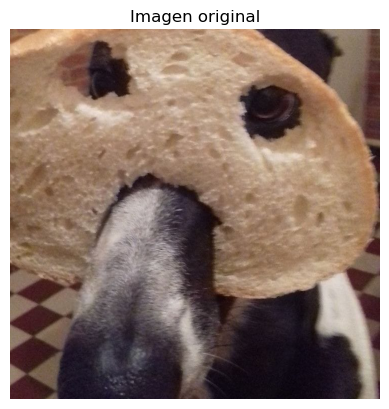

In [14]:
img = plt.imread('../Assets/greyhound.jpg')

print("Image Shape:", img.shape)

plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')
plt.show()


In [6]:
def svd_estudiantes(A):
    """
    Esta función calcula la descomposición SVD de una matriz A.
    Devuelve U, S y Vt.
    """
    # ----------------------------------------------------------
    # ACA VA SU CODIGO
    U = []
    S = []
    Vt = []
    # ----------------------------------------------------------
    
    return U, S, Vt

In [7]:

img_float = img.astype(np.float32) / 255.0
R = img_float[:,:, 0]
G = img_float[:,:, 1]
B = img_float[:,:, 2]
U_r, S_r, Vt_r = svd_estudiantes(R)
U_g, S_g, Vt_g = svd_estudiantes(G)
U_b, S_b, Vt_b = svd_estudiantes(B)

max_rank = min(R.shape[0], R.shape[1])

def svd_approx_estudiantes(k):
    """Reconstruye la imagen usando los primeros k valores singulares en cada canal."""
    
    # ----------------------------------------------------------
    # ACA VA SU CODIGO
    R_approx = 255*np.ones(img.shape[0:2])
    G_approx = 255*np.ones(img.shape[0:2])
    B_approx = 255*np.ones(img.shape[0:2])
    # ----------------------------------------------------------

    img_approx = np.stack([R_approx, G_approx, B_approx], axis=2)
    return img_approx

@interact(k=IntSlider(min=1, max=max_rank, step=1, value=1))
def show_svd_approx(k):
    """Comparativa entre la aproximaxión y la imgen original"""
    approx = svd_approx_estudiantes(k)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(np.clip(approx, 0, 1))
    axes[0].set_title(f"Aproximación con k={k}")
    axes[0].axis('off')
    
    axes[1].imshow(img_float)
    axes[1].set_title("Imagen original")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='k', max=736, min=1), Output()), _dom_classes=('widget-in…

---

# **Pauta Ejercicio 2**

Image Shape: (736, 736, 3)


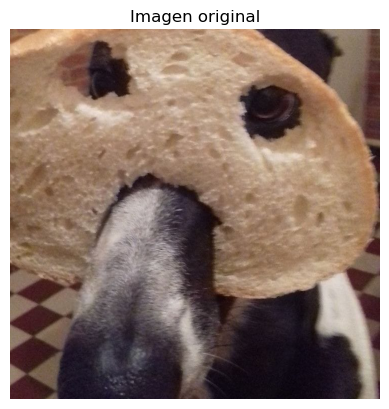

In [8]:
img = plt.imread('../Assets/greyhound.jpg')

print("Image Shape:", img.shape)

plt.imshow(img)
plt.title("Imagen original")
plt.axis('off')
plt.show()


In [ ]:

img_float = img.astype(np.float32) / 255.0
R = img_float[:,:, 0]
G = img_float[:,:, 1]
B = img_float[:,:, 2]
U_r, S_r, Vt_r = np.linalg.svd(R)
U_g, S_g, Vt_g = np.linalg.svd(G)
U_b, S_b, Vt_b = np.linalg.svd(B)

max_rank = min(R.shape[0], R.shape[1])

def svd_approx(k):
    """Reconstruye la imagen usando los primeros k valores singulares en cada canal."""
    R_approx = U_r[:, :k] @ np.diag(S_r[:k]) @ Vt_r[:k, :]
    G_approx = U_g[:, :k] @ np.diag(S_g[:k]) @ Vt_g[:k, :]
    B_approx = U_b[:, :k] @ np.diag(S_b[:k]) @ Vt_b[:k, :]

    img_approx = np.stack([R_approx, G_approx, B_approx], axis=2)
    return img_approx

@interact(k=IntSlider(min=1, max=max_rank, step=1, value=1))
def show_svd_approx(k):
    """Comparativa entre la aproximaxión y la imgen original"""
    approx = svd_approx(k)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(np.clip(approx, 0, 1))
    axes[0].set_title(f"Aproximación con k={k}")
    axes[0].axis('off')
    
    axes[1].imshow(img_float)
    axes[1].set_title("Imagen original")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=1, description='k', max=736, min=1), Output()), _dom_classes=('widget-in…

# REFERENCIAS

1. **The Matrix Cookbook** (Kaare Brandt Petersen): Sección 5.3
2. **Numerical Analysis** (Timothy Saur): Sección 12.3
3. **[visualización de la SVD](https://www.youtube.com/watch?v=vSczTbgc8Rc)**
4. **[SVD y sus aplicaciones](https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv)**


